In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [16]:
X_train.shape

(60000, 28, 28)

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

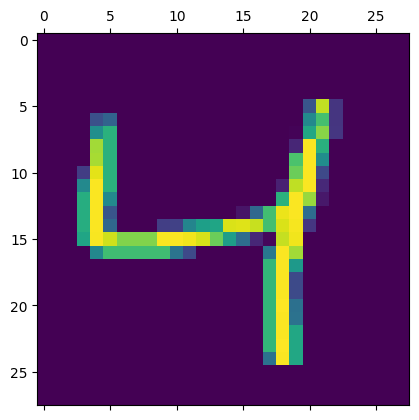

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
#flatten the X-train and X-test

X_train_f = X_train.reshape(len(X_train), 28*28)
X_test_f = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_f.shape

(60000, 784)

In [13]:
X_train_f[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_f, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4731 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9260


In [15]:
model.evaluate(X_test_f, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.9254


[0.26725393533706665, 0.9254000186920166]

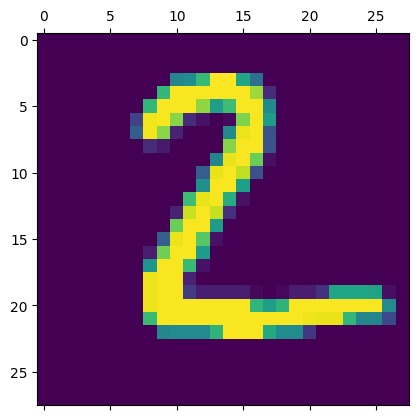

In [16]:
plt.matshow(X_test[1])

In [17]:
y_pred = model.predict(X_test_f)

313/313 [==============================] - 0s 1ms/step


In [18]:
y_pred[1]

array([5.7943279e-01, 9.3277367e-03, 9.9942303e-01, 3.7557456e-01,
       6.5250660e-10, 8.7573218e-01, 9.0028292e-01, 2.3190675e-12,
       2.0667492e-01, 5.5553158e-09], dtype=float32)

In [19]:
np.argmax(y_pred[1])

2

In [20]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   9,   10,  919,   19,    8,    3,   13,   10,   37,    4],
       [   4,    0,   17,  925,    0,   21,    2,    9,   23,    9],
       [   2,    2,    3,    1,  917,    0,    9,    4,    8,   36],
       [  11,    3,    4,   36,   11,  764,   15,    5,   35,    8],
       [  14,    3,    7,    1,    7,   12,  909,    2,    3,    0],
       [   1,    9,   20,    9,    8,    0,    0,  940,    2,   39],
       [   7,   11,    7,   17,    9,   22,    8,   10,  870,   13],
       [  11,    7,    1,    8,   27,    6,    0,   16,    5,  928]])>

Text(95.72222222222221, 0.5, 'True values')

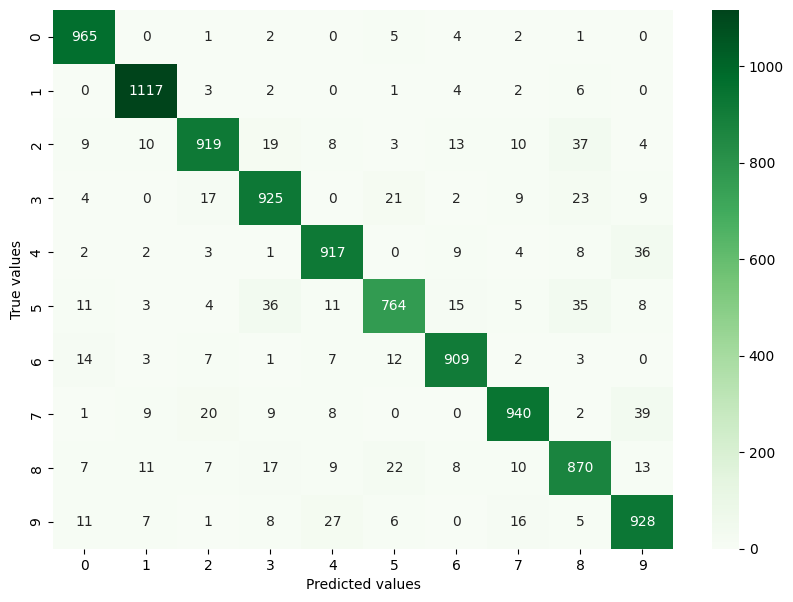

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('True values')

In [24]:
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model1.fit(X_train_f, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2718 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1237 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0844 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0639 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9845


In [25]:
model1.evaluate(X_test_f, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9734


[0.08550062775611877, 0.9733999967575073]

In [26]:
y_pred1 = model1.predict(X_test_f)

313/313 [==============================] - 0s 1ms/step


In [27]:
y_pred1_labels = [np.argmax(i) for i in y_pred1]

In [28]:
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred1_labels)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    1,    4,    3,    1,    3,    1],
       [   0, 1124,    3,    1,    0,    1,    2,    1,    3,    0],
       [   4,    0, 1003,    6,    2,    0,    3,    6,    8,    0],
       [   0,    0,    4,  992,    0,    8,    0,    3,    2,    1],
       [   0,    0,    2,    1,  953,    1,    8,    1,    1,   15],
       [   2,    1,    0,   11,    1,  868,    4,    0,    4,    1],
       [   2,    4,    0,    1,    3,    5,  940,    0,    3,    0],
       [   0,    5,    9,    7,    2,    0,    0,  995,    1,    9],
       [   2,    1,    3,   23,    4,    5,    2,    4,  928,    2],
       [   0,    6,    0,   17,    8,    4,    1,    4,    3,  966]])>

Text(95.72222222222221, 0.5, 'True values')

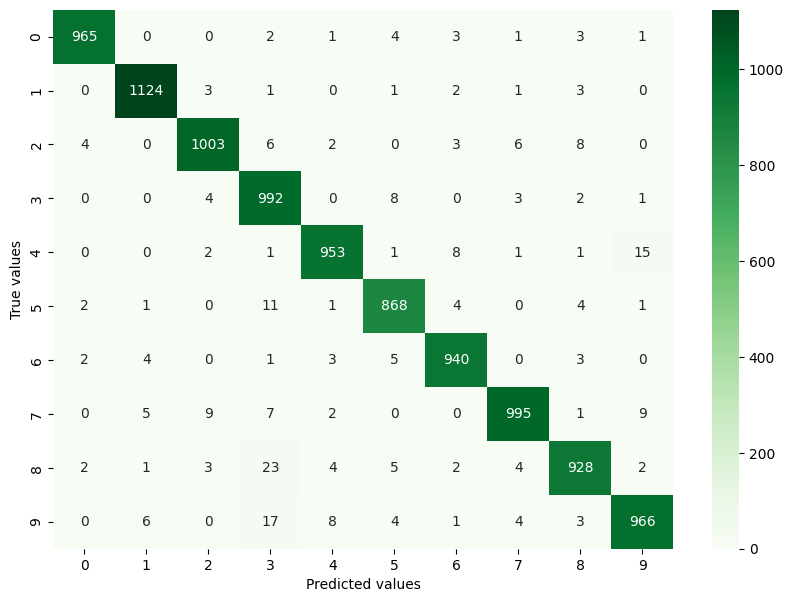

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('True values')

In [35]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2739 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1265 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0877 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0521 - accuracy: 0.9840


## Using CNN

In [11]:
from tensorflow.keras import models, layers

In [23]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [25]:
cnn.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0607 - accuracy: 0.9816
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0383 - accuracy: 0.9879
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0253 - accuracy: 0.9923
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0167 - accuracy: 0.9945
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0118 - accuracy: 0.9965


In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0560 - accuracy: 0.9831


[0.05598143860697746, 0.9830999970436096]

In [27]:
y_predc = cnn.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [28]:
y_predc[:5]

array([[3.14376131e-02, 7.51854122e-01, 3.26440036e-01, 3.56664509e-02,
        6.09110110e-03, 3.98844859e-05, 2.64456759e-07, 9.99999940e-01,
        1.36042200e-03, 4.21364512e-03],
       [9.25106108e-01, 9.99955595e-01, 1.00000000e+00, 1.23299262e-03,
        7.18476315e-07, 7.36769721e-07, 2.73087919e-01, 6.88577245e-04,
        9.91885439e-02, 2.39651172e-06],
       [9.68983024e-03, 9.99999106e-01, 2.11807173e-02, 1.14546151e-06,
        8.53582621e-01, 1.48113701e-03, 3.33167464e-02, 1.77762657e-01,
        9.78881586e-03, 4.16453579e-04],
       [1.00000000e+00, 4.95964065e-02, 8.83280277e-01, 1.40744227e-03,
        5.50500932e-04, 1.20398104e-01, 9.48634982e-01, 9.68087316e-01,
        1.07084772e-04, 1.80970859e-02],
       [2.70324945e-02, 7.21569499e-03, 8.81772414e-02, 7.94336572e-03,
        9.99999940e-01, 8.48437685e-06, 2.84082373e-04, 6.50442362e-01,
        1.86120227e-01, 9.09605086e-01]], dtype=float32)

In [29]:
y_predc1 = [np.argmax(i) for i in y_predc]
y_predc1[:5]

[7, 2, 1, 0, 4]

In [31]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test,y_predc1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



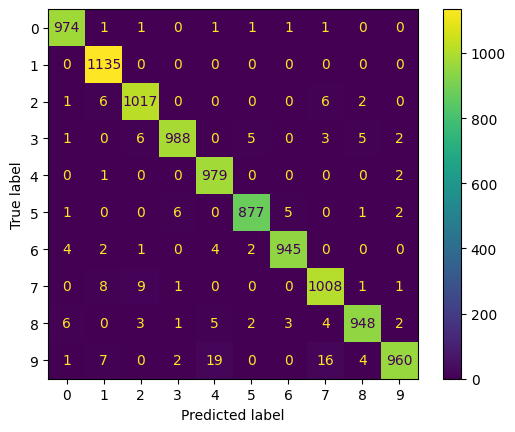

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predc1)